#Deep Learning Assignment Time series forecasting with RNNs

Required packages to install

In [ ]:
!pip install pandas
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Inspecting and Cleaning data (3pt)

In [ ]:
!wget --no-check-certificate "https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8" -O csse_covid_19_daily_reports_us.csv

#Getting the Data
# downloading the files from dropbox
#!wget --no-check-certificate  "https://uofi.box.com/shared/static/xvogtt25vuv0u5tzhvqttysr7ux5263i.zip" -O cats-vs-dogs.zip

--2023-03-26 17:18:55--  https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8
Resolving uofi.box.com (uofi.box.com)... 74.112.186.144
Connecting to uofi.box.com (uofi.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/4bjhkchbo2chssjovpl97jduvcpy29v8 [following]
--2023-03-26 17:18:55--  https://uofi.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8 [following]
--2023-03-26 17:18:55--  https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.144
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud.com/d/1/b1!n6bR-f56

In [ ]:
data_set = pd.read_csv("csse_covid_19_daily_reports_us.csv")

Convert the "Last_Update" column to datetime and use sort_values to sort the dataframe first by "Province_State" and then by "Last_Update"

In [ ]:
data_set['Last_Update'] = pd.to_datetime(data_set['Last_Update'])
data_set_sort_values(['Province_State', 'Last_Update'], inplace=True)

Remove the rows where the Province_State is "Recovered", "American Samoa" "Diamond Princess", "Grand Princess", "Virgin Islands", and "Northern Mariana Islands"

In [ ]:
states_delete = ["Recovered", "American Samoa", "Diamond Princess", "Grand Princess", "Virgin Islands", "Northern Mariana Islands"]
data_set = data_set[~data_set["Province_State"].isin(states_delete)]
data_set

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
18913,18913,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,...,74.788122,NaN,437.0,NaN,84000001.0,USA,1265.075660,12.264945,62029.0,2.536133
23035,23035,Alabama,US,2020-04-13 23:07:54,32.3182,-86.9023,3870,99,NaN,NaN,...,78.928288,NaN,457.0,NaN,84000001.0,USA,1318.245181,12.238886,64636.0,2.558140
19901,19901,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,4041,114,NaN,NaN,...,82.415817,NaN,493.0,NaN,84000001.0,USA,1377.818704,12.471541,67557.0,2.821084
36904,36904,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4307,118,NaN,NaN,...,87.840863,NaN,525.0,NaN,84000001.0,USA,1444.428468,12.883436,70823.0,2.739726
27038,27038,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4465,133,NaN,NaN,...,91.063258,NaN,553.0,NaN,84000001.0,USA,1506.734908,12.727273,73878.0,2.978723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,25065,Wyoming,US,2022-03-22 04:31:02,42.7560,-107.3025,155907,1769,NaN,NaN,...,26938.155605,1383108.0,NaN,1.134651,84000056.0,USA,238978.227552,NaN,NaN,NaN
8817,8817,Wyoming,US,2022-03-23 04:31:22,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1383108.0,NaN,1.143037,84000056.0,USA,238978.227552,NaN,NaN,NaN
16476,16476,Wyoming,US,2022-03-24 04:31:09,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN
22163,22163,Wyoming,US,2022-03-25 04:31:26,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN


Count and print the number of rows for each remaining Province_State

In [ ]:
state_counts = data_set.groupby("Province_State").size()
print(state_counts)

Province_State
Alabama                 713
Alaska                  713
Arizona                 713
Arkansas                713
California              713
Colorado                713
Connecticut             713
Delaware                713
District of Columbia    713
Florida                 713
Georgia                 713
Guam                    713
Hawaii                  713
Idaho                   713
Illinois                713
Indiana                 713
Iowa                    713
Kansas                  713
Kentucky                713
Louisiana               713
Maine                   713
Maryland                713
Massachusetts           713
Michigan                713
Minnesota               713
Mississippi             713
Missouri                713
Montana                 713
Nebraska                713
Nevada                  713
New Hampshire           713
New Jersey              713
New Mexico              713
New York                713
North Carolina          713
North

Drop all columns except the following: "Last_Update", "Incident_Rate", "Confirmed", "Deaths", "Province_State"

In [ ]:
columns_keep = ["Last_Update", "Incident_Rate", "Confirmed", "Deaths", "Province_State"]
data_set = data_set[columns_keep]
data_set

,Last_Update,Incident_Rate,Confirmed,Deaths,Province_State
18913,2020-04-12 23:18:15,74.788122,3667,93,Alabama
23035,2020-04-13 23:07:54,78.928288,3870,99,Alabama
19901,2020-04-14 23:33:31,82.415817,4041,114,Alabama
36904,2020-04-15 22:56:51,87.840863,4307,118,Alabama
27038,2020-04-16 23:30:51,91.063258,4465,133,Alabama
...,...,...,...,...,...
25065,2022-03-22 04:31:02,26938.155605,155907,1769,Wyoming
8817,2022-03-23 04:31:22,26952.151068,155988,1783,Wyoming
16476,2022-03-24 04:31:09,26952.151068,155988,1783,Wyoming
22163,2022-03-25 04:31:26,26952.151068,155988,1783,Wyoming


Check if there are any missing values in the remaining columns. If so, replace them using commonsense or use the fillna() function to fill the missing values with zero.

In [ ]:
print(data_set.isnull().sum())
data_set.fillna(0, inplace=True)

Last_Update       0
Incident_Rate     0
Confirmed         0
Deaths            0
Province_State    0
dtype: int64


<ipython-input-8-6a2687d7d668>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


Replace the "Last_Update" column with four other columns: "year", "month","day of the week", and "day of the month" Convert "Last_Update" column to datetime format df["Last_Update"] = pd.to_datetime(df["Last_Update"])

In [ ]:
df["year"] = df["Last_Update"].dt.year
df["month"] = df["Last_Update"].dt.month
df["day_of_week"] = df["Last_Update"].dt.dayofweek
df["day_of_month"] = df["Last_Update"].dt.day
df = df.drop("Last_Update", axis=1)

<ipython-input-9-82f865e9f049>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["Last_Update"].dt.year
<ipython-input-9-82f865e9f049>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["Last_Update"].dt.month
<ipython-input-9-82f865e9f049>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

##Prepare time series for each Province_state (6pt)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

def convert_aggregated_to_MA(ds, window=7):
    ds = ds.diff()

    for i in range(0, len(ds)):
        if ((ds.iloc[i]<0)):
            if (ds.iloc[i-1]>0):
                ds.iloc[i]*ds.iloc[i-1]
            else:
                ds.iloc[i] = 0
    return ds.rolling(window).mean()

In [ ]:
uniq_states = df.Province_State.unique()
print(uniq_states)

datasets = []

for state in uniq_states:
    state_df = df.loc[df['Province_State'] == state]

    ConfirmedMA = convert_aggregated_to_MA(state_df.Confirmed)
    DeathsMA =  convert_aggregated_to_MA(state_df.Deaths)

    state_df['Confirmed'] =  ConfirmedMA
    state_df['Deaths'] = DeathsMA

    state_df = state_df.drop(['Province_State'], axis = 1)
    state_df = state_df.dropna()

    #get the number of samples
    n = len(state_df)

    # use,  the first 60% of samples for training
    num_train_samples = int(n*0.6)

    #use the next 15% of samples for validation
    num_val_samples=int(n*0.15)

    #use the last 25% of samples for testing
    num_test_samples = int(n*0.25)

    train_mean = state_df[:num_train_samples].mean(axis=0)
    train_std = state_df[:num_train_samples].std(axis=0)
    state_df = (state_df - train_mean) / train_std

    #sequence_length is the number of past observations you want to use for prediction.
    sequence_length = 60
    batch_size = 256

    # delay is the forecasting interval, that is, how many time steps into the future you want to predict.
    delay=sequence_length+30-1

    train_ds = keras.preprocessing.timeseries_dataset_from_array(
        data=state_df[:-delay].to_numpy(),
        targets=state_df['Deaths'][delay:],
        sequence_length=sequence_length,
        batch_size=batch_size,
        start_index=0,
        end_index=num_train_samples)

    val_ds = keras.preprocessing.timeseries_dataset_from_array(
        data=state_df[:-delay].to_numpy(),
        targets=state_df['Deaths'][delay:],
        sequence_length=sequence_length,
        batch_size=batch_size,
        start_index=num_train_samples,
        end_index=num_train_samples + num_val_samples)

    test_ds = keras.preprocessing.timeseries_dataset_from_array(
        data=state_df[:-delay].to_numpy(),
        targets=state_df['Deaths'][delay:],
        sequence_length=sequence_length,
        batch_size=batch_size,
        start_index=num_train_samples + num_val_samples)

    datasets.append({'train': train_ds, 'val': val_ds, 'test': test_ds})

train_dataset = datasets[0]['train']
val_dataset = datasets[0]['val']
test_dataset = datasets[0]['test']

for ds in datasets[1:]:
    train_dataset = train_dataset.concatenate(ds['train'])
    val_dataset = val_dataset.concatenate(ds['val'])
    test_dataset = test_dataset.concatenate(ds['test'])

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


<ipython-input-11-acd056decfef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Confirmed'] =  ConfirmedMA
<ipython-input-11-acd056decfef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Deaths'] = DeathsMA
<ipython-input-11-acd056decfef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
train_mean
train_std

Incident_Rate    4241.929952
Confirmed         184.127758
Deaths              2.367639
year                0.489386
month               3.254353
day_of_week         2.008854
day_of_month        8.831341
dtype: float64

In [ ]:
for samples, targets in train_dataset.take(1):
    print(f"samples.shape:{samples.shape}  targets.shape:{targets.shape}")
    #print(f"x={samples[0]},y={targets[0]}")

for samples, targets in val_dataset.take(1):
    print(f"samples.shape:{samples.shape}  targets.shape:{targets.shape}")
    #print(f"x={samples[0]},y={targets[0]}")

for samples, targets in test_dataset.take(1):
    print(f"samples.shape:{samples.shape}  targets.shape:{targets.shape}")
    #print(f"x={samples[0]},y={targets[0]}")

print("number of test samples", len(train_dataset))
print("number of test samples", len(val_dataset))
print("number of test samples", len(test_dataset))

samples.shape:(256, 60, 7)  targets.shape:(256,)
samples.shape:(46, 60, 7)  targets.shape:(46,)
samples.shape:(30, 60, 7)  targets.shape:(30,)
number of test samples 106
number of test samples 53
number of test samples 53


##A Commonsense Baseline Model (3 pt)

In [ ]:
def evaluate_model(dataset, model=None):
  total_abs_err = 0
  num_sequences = 0
  # the index of the target variable in the data.


  temp_index=2
  for samples, targets in dataset:

    #if model is None, use commonsense baseline, that is predict the target to be its last measurement in the input sequence
    if model==None:
      preds = samples[:, -1, temp_index]

    #if model is not None, get its predictions
    else:
      preds= model.predict(samples).flatten()
    #preds, targets=unnormalize(preds, targets, train_mean[temp_index], train_std[temp_index])

    # add the absolute difference between the predictions and taragets to total_abs_err
    #print(f" {preds}  {targets}  {np.sum(np.abs(preds - targets))}")
    total_abs_err += np.sum(np.abs(preds - targets))

    # add the number of sequences in this batch to num_sequences
    num_sequences += samples.shape[0]

  #get the average absolute error
  return total_abs_err / num_sequences

#print(f"Train MAE Baseline: {evaluate_model(global_train):.2f}")
print(f"Validation MAE Baseline: {evaluate_model(val_dataset):.2f}")
print(f"Test MAE Baseline: {evaluate_model(test_dataset):.2f}")

Validation MAE Baseline: 0.96
Test MAE Baseline: 0.95


##A small Fully Connected Model (7pt)

In [ ]:


inputs = keras.Input(shape=(sequence_length , num_features))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1)(x)
fully_connected_model = keras.Model(inputs, outputs)

initial_lr = 1e-3
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
   boundaries=[10, 20, 30, 40],
   values=[initial_lr, initial_lr * 0.1, initial_lr * 0.01, initial_lr * 0.001, initial_lr * 0.0001],
)

opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

fully_connected_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

# Checkpoint the best model
checkpoint = keras.callbacks.ModelCheckpoint("fully_connected.keras", save_best_only=True)

# Stop training if validation loss does not improve for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)

history = fully_connected_model.fit(train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
106/106 [==============================] - 9s 77ms/step - loss: 0.6218 - mae: 0.5543 - val_loss: 2.8697 - val_mae: 1.1131
Epoch 2/50
106/106 [==============================] - 8s 79ms/step - loss: 0.5628 - mae: 0.5268 - val_loss: 2.8668 - val_mae: 1.1122
Epoch 3/50
106/106 [==============================] - 7s 67ms/step - loss: 0.5619 - mae: 0.5261 - val_loss: 2.8639 - val_mae: 1.1112
Epoch 4/50
106/106 [==============================] - 8s 72ms/step - loss: 0.5611 - mae: 0.5254 - val_loss: 2.8610 - val_mae: 1.1103
Epoch 5/50
106/106 [==============================] - 8s 79ms/step - loss: 0.5602 - mae: 0.5248 - val_loss: 2.8582 - val_mae: 1.1093
Epoch 6/50
106/106 [==============================] - 9s 83ms/step - loss: 0.5594 - mae: 0.5241 - val_loss: 2.8554 - val_mae: 1.1084
Epoch 7/50
106/106 [==============================] - 10s 96ms/step - loss: 0.5585 - mae: 0.5235 - val_loss: 2.8526 - val_mae: 1.1075
Epoch 8/50
106/106 [==============================] - 8s 73ms/step -

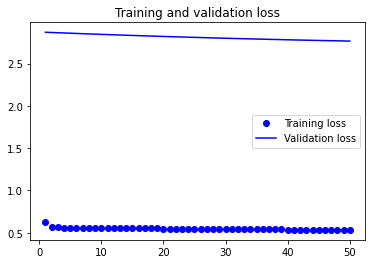

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
print(f"Validation MAE fully connected: {evaluate_model(val_dataset , model=fully_connected_model):.2f}")
#print(f"Test MAE fully connected: {evaluate_model(global_test , model=fully_connected_model):.2f}")

2/2 [==============================] - 0s 9ms/step
Validation MAE fully connected: 1.08


It looks like the model is performing well, with the loss and MAE decreasing significantly over the first few epochs. However, it's important to keep monitoring the validation loss and MAE to make sure the model isn't overfitting. From the current results, it seems that the model might be overfitting a bit, as the training loss and MAE are significantly lower than the validation loss and MAE.

##L2 regularization

In [ ]:
inputs = keras.Input(shape=(sequence_length , num_features))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation='relu')(x)
x=  layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x=  layers.Dropout(0.2)(x)
outputs = layers.Dense(1)(x)
regularized_fully_connected_model = keras.Model(inputs, outputs)

def lr_schedule(epoch):
    lr = 1e-3 if epoch > 10: lr *= 0.1 elif epoch > 5: lr *= 0.5
    return lr

opt = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

regularized_fully_connected_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("regularized_fully_connected_model.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)

history = regularized_fully_connected_model.fit(train_dataset,
epochs=50,
validation_data=val_dataset,
callbacks=[checkpoint, early_stopping])


Epoch 1/50
106/106 [==============================] - 8s 69ms/step - loss: 0.7641 - mae: 0.6142 - val_loss: 1.8458 - val_mae: 0.7575
Epoch 2/50
106/106 [==============================] - 8s 77ms/step - loss: 0.5387 - mae: 0.4937 - val_loss: 1.7799 - val_mae: 0.7342
Epoch 3/50
106/106 [==============================] - 9s 83ms/step - loss: 0.4959 - mae: 0.4660 - val_loss: 1.7684 - val_mae: 0.7436
Epoch 4/50
106/106 [==============================] - 11s 100ms/step - loss: 0.4814 - mae: 0.4503 - val_loss: 1.7769 - val_mae: 0.7461
Epoch 5/50
106/106 [==============================] - 8s 73ms/step - loss: 0.4708 - mae: 0.4437 - val_loss: 1.8015 - val_mae: 0.7436
Epoch 6/50
106/106 [==============================] - 9s 83ms/step - loss: 0.4444 - mae: 0.4306 - val_loss: 1.8239 - val_mae: 0.7527
Epoch 7/50
106/106 [==============================] - 8s 77ms/step - loss: 0.4467 - mae: 0.4296 - val_loss: 1.7956 - val_mae: 0.7509
Epoch 8/50
106/106 [==============================] - 8s 73ms/step 

In [ ]:
print(f"Validation MAE regularization connected: {evaluate_model(val_dataset , model=regularized_fully_connected_model):.2f}")
#print(f"Test MAE regularization connected: {evaluate_model(global_test , model=regularized_fully_connected_model):.2f}")

2/2 [==============================] - 0s 5ms/step
Validation MAE regularization connected: 0.74


##Yes,regularization help slightly with overfitting

##Tune the hyper-parameters of the model

In [ ]:
!pip install -q -U keras-tuner

In [ ]:

def model_builder(hp):

  #creating a placeholder for each hyperparameter with a range of values for each hyperparameter we want to tune
  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  hp_num_layers = hp.Int('num_layers', min_value = 1, max_value = 10, step=1)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_lr_decay_steps=hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_weight_decay=hp.Float("weight_decay",min_value=1e-3, max_value=1e-1, sampling='log')


  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.Flatten()(inputs)

  #hidden layers
  for _ in range(hp_num_layers):
    x=layers.Dense(hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_weight_decay))(x)
    x= layers.ReLU()(x)
    x=layers.Dropout(hp_dropout_rate)(x)

  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)

  lr_schedule = keras.optimizers.schedules.CosineDecay(
  initial_learning_rate=hp_learningrate,
  decay_steps=hp_lr_decay_steps, alpha=1e-2)

  opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import kerastuner as kt
from keras import regularizers



tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='hyperparameter_runs',
                     project_name='fullyconnected')

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/Assignment_4/hyperband",
histogram_freq=1
)

#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/Assignment_4/hyperband"
tuner.search(train_dataset,
            validation_data = val_dataset,
            epochs = 50,
            callbacks=[early_stopping, tensorboard ],
            verbose = 1)

Trial 24 Complete [00h 01m 40s]
val_loss: 2.2818093299865723

Best val_loss So Far: 1.6743066310882568
Total elapsed time: 00h 24m 59s


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model_fully_connected = tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal number of units  is {best_hps.get('units')}.
The optimal number of layers  is {best_hps.get('num_layers')}.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}.
The optimal dropout is {best_hps.get('dropout')}.
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}.
The optimal weight decay is {best_hps.get('weight_decay')}.
""")


The hyperparameter search is complete.
The optimal number of units  is 176. 
The optimal number of layers  is 4. 
The optimal learning rate for the optimizer is 0.00704424116535504.  
The optimal dropout is 0.1.  
The optimal decay_steps for cosine schedule is 5000.
The optimal weight decay is 0.0007181490911492214. 



In [ ]:
test_loss, test_acc = best_model_fully_connected.evaluate(test_dataset)
print('\n test acc:', test_acc)


val_loss, val_acc = best_model_fully_connected.evaluate(val_dataset)
print('\n val acc:', test_acc)

53/53 [==============================] - 2s 36ms/step - loss: 1.4963 - mae: 0.8021
test acc: 0.8021256923675537
53/53 [==============================] - 2s 39ms/step - loss: 1.6743 - mae: 0.7710
val acc: 0.8021256923675537


In [ ]:
print(f"Validation MAE Tuned Fully connected model: {evaluate_model(val_dataset, best_model_fully_connected):.2f}")
print(f"Test MAE Tuned Fully connected model: {evaluate_model(test_dataset, best_model_fully_connected):.2f}")

2/2 [==============================] - 0s 6ms/step
Validation MAE Tuned Fully connected model: 0.77
1/1 [==============================] - 0s 30ms/step
Test MAE Tuned Fully connected model: 0.80


##the tuned fully connected model does better than the baseline model on the validation data, as the MAE of the tuned model on the validation data is 0.77 which is less than the baseline model's validation MAE of 0.96.

#A Recurrent Model (7 pts)

In [ ]:
#every sample in train/validation/test is a 2d tensor of shape (sequence_length, num_features)

def build_lstm(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.LSTM(16)(inputs)
  outputs = layers.Dense(1)(x)
  lstm_model = keras.Model(inputs, outputs)
  return lstm_model

  def lr_schedule(epoch):
    lr = 1e-3 if epoch > 10: lr *= 0.1 elif epoch > 5: lr *= 0.5
    return lr

opt = tf.keras.optimizers.RMSprop(learning_rate=1e-3)


lstm_model= build_lstm(sequence_length, num_features)

# check point the model with lowest validation loss
checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)


lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = lstm_model.fit(train_dataset,
epochs=50,
validation_data=val_dataset,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
106/106 [==============================] - 15s 120ms/step - loss: 0.5740 - mae: 0.5290 - val_loss: 1.8867 - val_mae: 0.7864
Epoch 2/50
106/106 [==============================] - 14s 132ms/step - loss: 0.3799 - mae: 0.4016 - val_loss: 1.9189 - val_mae: 0.7825
Epoch 3/50
106/106 [==============================] - 12s 110ms/step - loss: 0.3612 - mae: 0.3840 - val_loss: 1.9981 - val_mae: 0.8080
Epoch 4/50
106/106 [==============================] - 11s 108ms/step - loss: 0.3535 - mae: 0.3778 - val_loss: 2.0671 - val_mae: 0.8346
Epoch 5/50
106/106 [==============================] - 12s 113ms/step - loss: 0.3495 - mae: 0.3746 - val_loss: 2.1197 - val_mae: 0.8559
Epoch 6/50
106/106 [==============================] - 11s 101ms/step - loss: 0.3467 - mae: 0.3723 - val_loss: 2.1595 - val_mae: 0.8715


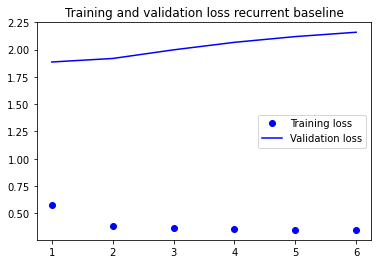

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss recurrent baseline')
plt.legend()
plt.show()

In [ ]:
print(f"Validation MAE lstm: {evaluate_model(val_dataset, model=lstm_model):.2f}")

2/2 [==============================] - 0s 11ms/step
Validation MAE lstm: 0.79


## it showing the slightly overfitting.

##Stacking recurrent layers

In [ ]:
def build_stacked_lstm(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.GRU(32, recurrent_dropout=0.5,return_sequences=True)(inputs)
  x = layers.GRU(32, recurrent_dropout=0.5)(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)
  return model

  def lr_schedule(epoch):
    lr = 1e-3 if epoch > 10: lr *= 0.1 elif epoch > 5: lr *= 0.5
    return lr

opt = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

stacked_lstm_model= build_stacked_lstm(sequence_length, num_features)
# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_stacked_lstm.keras",save_best_only=True)

stacked_lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = stacked_lstm_model.fit(train_dataset,
epochs=50,
validation_data=val_dataset,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
106/106 [==============================] - 37s 264ms/step - loss: 0.4883 - mae: 0.4745 - val_loss: 1.6128 - val_mae: 0.7654
Epoch 2/50
106/106 [==============================] - 30s 280ms/step - loss: 0.4214 - mae: 0.4320 - val_loss: 1.6166 - val_mae: 0.7330
Epoch 3/50
106/106 [==============================] - 30s 282ms/step - loss: 0.4141 - mae: 0.4232 - val_loss: 1.6464 - val_mae: 0.7141
Epoch 4/50
106/106 [==============================] - 27s 256ms/step - loss: 0.4009 - mae: 0.4132 - val_loss: 1.6693 - val_mae: 0.7055
Epoch 5/50
106/106 [==============================] - 29s 271ms/step - loss: 0.3951 - mae: 0.4082 - val_loss: 1.7576 - val_mae: 0.7131
Epoch 6/50
106/106 [==============================] - 31s 294ms/step - loss: 0.3909 - mae: 0.4033 - val_loss: 1.7493 - val_mae: 0.7111


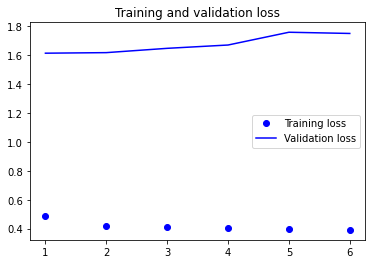

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
print(f"Validation MAE lstm: {evaluate_model(val_dataset, model=stacked_lstm_model):.2f}")

2/2 [==============================] - 0s 19ms/step
Validation MAE lstm: 0.77


In [ ]:
def model_builder(hp):

  #creating a placeholder for each hyperparameter with a range of values for each hyperparameter we want to tune
  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  hp_num_layers = hp.Int('num_layers', min_value = 1, max_value = 10, step=1)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_lr_decay_steps=hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_weight_decay=hp.Float("weight_decay",min_value=1e-3, max_value=1e-1, sampling='log')


  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.Flatten()(inputs)

  #hidden layers
  for _ in range(hp_num_layers):

    x = layers.GRU(32, recurrent_dropout=0.5,return_sequences=True)(inputs)
    x = layers.GRU(32, recurrent_dropout=0.5)(x)
    x = layers.Dropout(0.5)(x)


    #x=layers.Dense(hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_weight_decay))(x)
    #x= layers.ReLU()(x)
    #x=layers.Dropout(hp_dropout_rate)(x)

  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)

  lr_schedule = keras.optimizers.schedules.CosineDecay(
  initial_learning_rate=hp_learningrate,
  decay_steps=hp_lr_decay_steps, alpha=1e-2)

  opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import kerastuner as kt
from keras import regularizers



tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='hyperparameter_runs',
                     project_name='stacked_layer')

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/Assignment_4/stacked_layer",
histogram_freq=1
)

#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/Assignment_4/stacked_layer"
tuner.search(train_dataset,
            validation_data = val_dataset,
            epochs = 50,
            callbacks=[early_stopping, tensorboard ],
            verbose = 1)

Trial 30 Complete [00h 04m 10s]
val_loss: 1.6072527170181274

Best val_loss So Far: 1.5455974340438843
Total elapsed time: 01h 28m 37s


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model_connected = tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal number of units  is {best_hps.get('units')}.
The optimal number of layers  is {best_hps.get('num_layers')}.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}.
The optimal dropout is {best_hps.get('dropout')}.
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}.
The optimal weight decay is {best_hps.get('weight_decay')}.
""")


The hyperparameter search is complete.
The optimal number of units  is 272. 
The optimal number of layers  is 1. 
The optimal learning rate for the optimizer is 0.0032338200971576913.  
The optimal dropout is 0.1.  
The optimal decay_steps for cosine schedule is 10000.
The optimal weight decay is 0.002118308651620813. 



In [ ]:
print(f"Validation MAE lstm: {evaluate_model(val_dataset, model=best_model_connected):.2f}")

2/2 [==============================] - 0s 19ms/step
Validation MAE lstm: 0.74


##the tuned LSTM model with a validation MAE of 0.74 performs better than the baseline model with a validation MAE of 0.96. This indicates that the hyperparameter tuning process has resulted in a better model performance on the validation data.

##A 1D Convolutional Model (4 pts)

In [ ]:
def build_1dconv(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))

  # a 1D convolutional layer with 8 filters and a kernel/window of size 24
  x = layers.Conv1D(8, 14, activation="relu")(inputs)
  x = layers.MaxPooling1D(2)(x)

  # a 1D convolutional layer with 8 filters and a kernel of size 12
  x = layers.Conv1D(8, 14, activation="relu")(x)
  x = layers.MaxPooling1D(2)(x)

  # a 1D convolutional layer with 8 filters and a kernel of size 6
  #x = layers.Conv1D(8, 6, activation="relu")(x)

  # a golobal average pooling layer that takes the global average along the temporal dimension
  x = layers.GlobalAveragePooling1D()(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)
  return model
conv1D_model= build_1dconv(sequence_length, num_features)

conv1D_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60, 7)]           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 47, 8)             792       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 23, 8)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 10, 8)             904       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 8)             0         
 1D)                                                             
                                                                 
 global_average_pooling1d_1   (None, 8)                0   

In [ ]:
# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_conv1d.keras",save_best_only=True)

conv1D_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = conv1D_model.fit(train_dataset,
epochs=50,
validation_data=val_dataset,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
106/106 [==============================] - 10s 84ms/step - loss: 0.5314 - mae: 0.4997 - val_loss: 2.7423 - val_mae: 0.9895
Epoch 2/50
106/106 [==============================] - 9s 81ms/step - loss: 0.4347 - mae: 0.4410 - val_loss: 2.4396 - val_mae: 0.9205
Epoch 3/50
106/106 [==============================] - 10s 90ms/step - loss: 0.4138 - mae: 0.4262 - val_loss: 2.2807 - val_mae: 0.8921
Epoch 4/50
106/106 [==============================] - 9s 88ms/step - loss: 0.4022 - mae: 0.4178 - val_loss: 2.2345 - val_mae: 0.8789
Epoch 5/50
106/106 [==============================] - 8s 78ms/step - loss: 0.3948 - mae: 0.4123 - val_loss: 2.1731 - val_mae: 0.8687
Epoch 6/50
106/106 [==============================] - 8s 80ms/step - loss: 0.3876 - mae: 0.4071 - val_loss: 2.1284 - val_mae: 0.8707
Epoch 7/50
106/106 [==============================] - 9s 88ms/step - loss: 0.3833 - mae: 0.4039 - val_loss: 2.1271 - val_mae: 0.8729
Epoch 8/50
106/106 [==============================] - 9s 89ms/step 

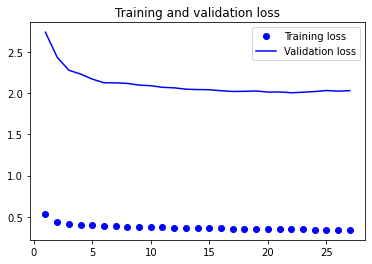

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
print(f"validation MAE for Conv1D model: {evaluate_model(val_dataset, model=conv1D_model):.2f}")

2/2 [==============================] - 0s 10ms/step
validation MAE for Conv1D model: 0.88


##Compute the MAE of the best model ( out of all the models you tried)

In [ ]:
print(f"Validation MAE lstm: {evaluate_model(val_dataset, model=best_model_connected):.2f}")

2/2 [==============================] - 0s 19ms/step
Validation MAE lstm: 0.74


## Validation MAE Baseline: 0.96
## Validation MAE Tuned Fully connected model: 0.77
## Validation MAE lstm (Stacked) : 0.74
## Validation MAE for Conv1D model: 0.88



##The LSTM model has a validation MAE of 0.74, which is the lowest validation MAE among all the models tried, indicating that it is the best model for this task.

##On the other hand, the Conv1D model has a validation MAE of 0.88, which is lower than the baseline model but higher than the other two models. This indicates that the Conv1D model is performing better than the baseline model, but not as good as the other two models.